In [8]:
import numpy as np
import panel as pn

pn.extension("katex")

# Wells

(_The contents are based on the class lecture materials of Prof. R. Liedl. Modifications mostly to fit this specific format were done by Prof. Liedl and Dr. P. K. Yadav._)

---

## Motivation

In the last lecture ({doc}`/content/flow/L7/17_quantify_flow` we derived system equations for different groundwater flow problems. We realized of the difficulties associated with solving flow problems specially at higher dimensions (2D/3D). Numerical methods are mostly used for solving groundwater problems but direct (analytical) solutions are also possible for some problems. 

**Wells** are the most common and also most extensively used method of utilizing (or affecting) groundwater. Thus, _wells_ represent a very common groundwater problem. We can now use our understanding of aquifer properties and groundwater system equations to analyze effect of _wells_ on the natural groundwater flow. We will however restrict our extent, in this lecture, to problems that can be directly solved. After learning numerical methods (in last part of this course), we will apply it to evaluate more complex groundwater problems also associated with wells.

We begin this lecture recalling groundwater storage property _transmissivity._ Introducing _wells_ we then derive few relations that can help us understand the effect of wells in groundwater flow. To conclude, we will use the _wells_ to characterize aquifers, i.e., using so called pumping test.

## Transmissivity ##

When discussing storage properties in {doc}`/content/flow/L3/13_gw_storage`, we saw that aquifers or single layers may frequently be treated as two-dimensional systems. This is justified because the lateral extension of aquifers is usually much larger than the vertical extension. Thus, vertical variations of storage properties can be replaced by some average value without adversely affecting the quantification of groundwater storage.

Similar things can be done with regard to conductivity properties and this brings us to the geohydraulic parameter of transmissivity ($T$,  L$^2$T$^{-1}$). The idea is to neglect vertical variations of hydraulic conductivity and to use vertically averaged values instead. This procedure does not eliminate horizontal variability, so transmissivity may still depend on horizontal coordinates  $(x, y)$.

The vertically averaged $K$ value is then multiplied by the water-saturated thickness to obtain transmissivity. The concept of water-saturated thickness (or water-saturated depth) requires to distinguish whether _confined_ or _unconfined flow_ conditions prevail.

In general, water-saturated thickness is the distance from the aquifer bottom to a level up to which all pores are filled with water. For _confined aquifers,_ this level is equal to aquifer top and water-saturated thickness is tantamount to aquifer thickness. For _unconfined aquifers,_ however, water-saturated thickness corresponds to the distance between aquifer bottom and groundwater level. We will see some illustrations below when we try to quantify transmissivity.

Let us have a closer look at the confined case first. The black cuboid in {numref}`Trans_c_2D`  illustrates that water-saturated thickness extends from aquifer bottom to aquifer top. So, it is equal to aquifer thickness $m$. Transmissivity is calculated by $T_x = K_x \cdot m$ and $T_y = K_y \cdot m$. Here we allow for horizontal aquifer anisotropy with different hydraulic conductivities in $x-$ and $y-$ direction $(K_x\neq K_y)$. For horizontally isotropic aquifers $(K_x = K_y = K)$, transmissivity is given by $T = K \cdot m$.

```{figure} images/L08_f1.png
---
scale: 40%
align: center
name: Trans_c_2D
---
The transmissivity cuboid in confined aquifer.
```
Things are a bit more complicated for unconfined aquifers.  {numref}`Trans_u_2D` illustrates that water-saturated thickness extends from the aquifer bottom to the groundwater table. It is important to note that transmissivity of unconfined aquifers depends on the vertical position of the groundwater table. For instance, if the groundwater table is lowered during to a draught period, transmissivity is decreasing. This is fundamentally different from the confined case where the water-saturated thickness is given by aquifer geometry only and is not affected by hydraulic head changes.

```{figure} images/L08_f2.png
---
scale: 40%
align: center
name: Trans_u_2D
---
The transmissivity cuboid in unconfined aquifer.
```

Computing transmissivity of unconfined aquifers requires to determine the difference of hydraulic head h and the elevation of aquifer bottom $z_{bot}$. Based on this, transmissivity is given by $T_x = K_x\cdot(h - z_{bot})$ and $T_y = K_y\cdot(h - z_{bot})$. As above, we are allowing for horizontal aquifer anisotropy. For an isotropic unconfined aquifer we get $T = K\cdot(h - z_{bot})$.

Two more remarks appear to be appropriate: First, transmissivity may be computed by the given equations even if the aquifer bottom is not horizontal. This case is not covered by the {numref}`Trans_u_2D`. Second, textbooks frequently present the equation **$T = K\cdot h$** for transmissivity of unconfined aquifers. It is to be noted that this equation only holds if two conditions are fulfilled: 

```{admonition} Required conditions when $T = K\cdot h$ is valid
:class: note
1. The aquifer bottom must be horizontal, and 

2. hydraulic head values are expressed with respect to the elevation of aquifer bottom (= reference datum).
```
Finally, we can try to compute transmissivity for isotropic aquifers and check how the result depends on several quantities like aquifer bottom, aquifer top, and hydraulic head.

### Example problem  ###

```{admonition} Transmissivity
Find if the aquifer is confined or unconfined, and then calculate transmissivity of the aquifer.
```

In [9]:
K_a = 8.5e-05 # m/s, Hydraulic conductivity 
Z_bot = 120 # m, aquifer bottom 
Z_top = 150 # m, aquifer top
h_a   =  139 # m, hydraulic head in aquifer

# interim calculation
A_t = Z_top-Z_bot # m, Aquifer thickness
A_wt = h_a - Z_bot # m, water_table level
S_t = min(A_t, A_wt) # m, saturated thickness

# result
if h_a<Z_top:
    print("It is Unconfined Aquifer \n") 
else: 
    print("It is Confined Aquifer \n") 

T_a = K_a*S_t # m^2/s, transmissivity

print("The required transmissivity is {0:1.2e}".format(T_a), "m\u00b2/s")


It is Unconfined Aquifer 

The required transmissivity is 1.62e-03 m²/s


## Wells - Overview ##

### What is a Well? ###

A **well** is a shaft or a hole that has been sunk, dug or drilled into the earth to extract water (source: [Glossary of Hydrology](https://hydrologie.org/glu/HINDEN.HTM)).

```{figure} images/L08_f3.png
---
scale: 50%
align: center
name: Well
---
Well and its components.
```

### Using wells ###

Wells are very extensively used around the globe. The contents below only highlights few of the use of wells.



> Water supply: e.g., for households, agriculture, industry

> Lowering the groundwater level: e.g., for excavations, open-pit mining

> Remediation of aquifer contamination: e.g., applying pump and treat method.

> Aquifer characterisation: e.g., using pumping test (this lecture)

Apart from aquifer characterisation, wells are usually operated at steady-state i.e., at constant pumping rate. The figure below presents different uses of wells. {numref}`Well-ex` shows the case of lowering the groundwater level at the excavation site. The lowering is very often observed at the works that requires sub-surface construction works, e.g., high-rise building, tunnels. For this wells are placed close to excavation works and water is pumped out at higher discharge rates compare to the groundwater replenishing rate. This leads to decline of water level at the excavation site.

```{figure} images/L08_f5.png
---
scale: 40%
align: center
name: Well-ex
---
Well at the excavation site
```

{numref}`Well-refuse` presents the case of using wells to delineate contamination site from the groundwater. These are part of the development of sanitary landfills sites or industries that pose threat to groundwater quality. Wells are used to lower groundwater table such that seepage of refuse is contained in the limited region.

```{figure} images/L08_f6z.png
---
width: 30 cm
height: 8 cm
align: center
name: Well-refuse
---
Well at the refuse site
```

### Fully versus Partially Penetrating Wells ###

Fully penetrating wells:
: The fully penetrating wells are those which extends through the whole saturated depth of an aquifer and are constructed in such a manner that water is permitted to the well screen over its length [Glossary of Hydrology](https://hydrologie.org/glu/HINDEN.HTM)). 

{numref}`full-pen` shows a schematic of water flow in a fully penetrating wells. 

```{figure} images/L08_f7x.png
---
scale: 40%
align: center
name: full-pen
---
Flownet in a fully penetrating wells
```

Partially penetrating Wells:
: The partially penetrating Wells are those in which the length of water entry is less than the thickness of the saturated aquifer which it penetrates ([Glossary of Hydrology](https://hydrologie.org/glu/HINDEN.HTM)). 

Partially penetrating wells are constructed when aquifer depths are very high; in which case a fully penetrating well may not also be economical. {numref}`par-pen` presents a schematic of a flownet that is likely to be observed in the partially penetrating well.

```{figure} images/L08_f7y.png
---
scale: 40%
align: center
name: par-pen
---
Flownet in a partially penetrating wells
```

Comparing the Flownets in {numref}`full-pen` and {numref}`par-pen`, it can be observed that the vertical flow components can be significant in the partially penetrating case. This then lead to a 3D groundwater problem compared to the fully penetrating case, which can be treated as 2D groundwater problem as vertical flow component has limited effect.  

This course we will deal only with the fully penetrating steady-state cases.


## Groundwater Flow Near Wells Operated at Steady State ## 

As stated earlier wells are mostly operated under steady-state condition. Here will attempt to quantify the case. We will first attempt to identify the most relevant problems associated with the steadily pumping wells and then define our approach to solve them. The **two** most important points that need to be addressed here  are:

> Which relevant quantities are needed to describe steady-state flow
towards a well?

> What is the quantitative relationship between the hydraulic
parameters under steady-state conditions?

To answer the above questions, we follow the following approach:

> Find an appropriate way to apply the _law of continuity_
(conservation of volume) and _Darcy‘s law._

> We delineate the problem, e.g., study the _confined_ and the _unconfined_ cases separately.


### Cone of Depression in a Confined Aquifer ###

A **cone of depression** (or drawdown cone) will result when the well pumps groundwater groundwater is pumped from the well. {numref}`cone-con-un` presents the schematic with relevant quantities of a well pumping case in both confined and unconfined aquifers. In both cases the well is fully penetrating. As can be understood from the figure that in the unconfined case the drawdown ($s$) magnitude depends on the water table level. This in the case of confined aquifer is dependent on the hydraulic head.


```{figure} images/L08_f8-9.png
---
scale: 25%
align: center
name: cone-con-un
---
Cone of depression in a (a) confined Aquifer and (b) unconfined aquifer (right)
```

 Relevant quantities in the figure:
+ pumping rate $Q$ [L$^3$T$^{-1}$]
% free space
+ aquifer thickness $m$ [L]
% free space
+ hydraulic conductivity $K$ [LT$^{-1}$]
% free space
+ water level at rest $H$ [L]
% free space
+ water-level in the well $h$ [L]
% free space
+ Radius of influence $R$ [L]
% free space
+ well radius $r_w$ (incl. gravel pack!)[L]
% free space
+ drawdown $s = H - h$ [L]


The Radius of influence ($R$) in the figure is the distance from the well at which the drawdown becomes negligible or unobservable. Thus $R$ delineates the influence of the well on the normal groundwater flow. 

#### Evolution of Cone of Depression with Time ####

Transient models have to be used to observe the evolution of cone of depression. These are mostly only possible through use of numerical models (to be discussed in the later end of this course). The animation provides the computer simulation of evolving cone of depression as a function of time. From the figure it is easier to obtain the radius of influence ($R$). It is to be noted that $R$ will be maximum at the steady-state condition. 

Row
    [0] Video(str, height=150, sizing_mode='fixed', width=400)
    [1] Spacer(width=50)
    [2] PNG(str, width=200)
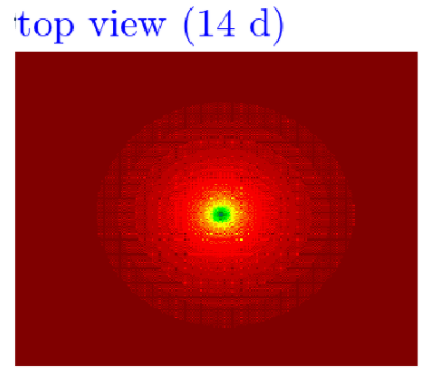

In [10]:
video1 = pn.pane.Video("images/L08_f9X.mp4", width=400, height=150, loop=False)
spacer = pn.Spacer(width=50)
image = pn.pane.PNG("images/L08_f9Y.png", width=200)
pn.Row(video1, spacer, image)

### Law of Continuity ###

Next we attempt to quantify the cone of depression. For this, and it is common in any hydraulics study, we begin with the _Law of Continuity._ Overall law of continuity implies:

```{admonition} Law of Continuity
Discharge $Q_w = $ constant
```

```{figure} images/L08_f10X.png
---
scale: 40%
align: center
name: law-cont
---
Graphic visualization of Law of quantity.
```

This, also seen in {numref}`law-cont`, implies that the pumping rate $Q$ corresponds to the discharge $Q_w$ near the well. Further, under steady-state conditions the law of continuity
implies that there is the same discharge at all cross sections which
completely surround the well ("mantle of a cylinder").

### Darcy's Law for Flow Towards a Well in a Confined Aquifer ###

The Darcy's law, as we have known so far,  relates the Darcy's velocity $v_f$ and the hydraulic gradient $i$. If the hydraulic gradient was constant in space, the hydraulic gradient would be (also see {numref}`law-cont` )

$$
i = \frac{\Delta h}{\Delta r}
$$

where, $r$ represents the radial distance from the well axis. In this case the hydraulic gradient $i$ depends on the distance $r$ within a cone of depression {numref}`law-cont`). Qualitatively, it can be understood that $i$ is decreasing with increasing distance from the well. Since the hydraulic gradient is not constant in space, the ratio $\frac{\Delta h}{\Delta r}$ has to be replaced by

$$
i(r) = \frac{\textrm{d} h (r)}{\textrm{d} r} \tag{C1}
$$

With this defined, the Darcy's law should be expressed as function of $r$ as

$$
v_f (r) = - K\cdot i(r) = - K \cdot \frac{\textrm{d} h (r)}{\textrm{d} r} \tag{C2}
$$

And, now introducing the continuity equation we obtain:

$$
Q_w = A\cdot v_f (r) = - K\cdot i(r) = - K \cdot A\cdot\frac{\textrm{d} h (r)}{\textrm{d} r} \tag{C3}
$$

with $A$ is the area of a cross section at distance $r$ from the well axis. Therefore $A$ is

$$
A = 2\cdot \pi \cdot r \cdot m \tag{C4}
$$

$A$ is now inserted to eq. (C3), This results to

$$
Q_w =  - 2\cdot \pi \cdot r \cdot m \cdot K \cdot \frac{\textrm{d} h (r)}{\textrm{d} r} \tag{C5}
$$


```{image} images/L08_f8.png
:width: 300px
:align: center
:name: Difference between international and German definition of groundwater.
```


Eq (C5) is a first-order differential equation for hydraulic head $h(r)$. It can be solved by separation of variable. Doing that eq. (C5) becomes
$$
\textrm{d}h(r) = \frac{Q_w}{2\cdot \pi \cdot m \cdot K }\cdot \frac{\textrm{d}r}{r} \tag{C6}
$$

We now integrate eq. (C6). The limit of integration (see figure) along the vertical direction ($h$) will be from $h$ to $H$, and that along the radial axis will be from $r_w$ and $R$, i.e., we get

$$
\int\limits_h^H\textrm{d}h(r) = \frac{Q_w}{2\cdot \pi \cdot m \cdot K }\cdot \int\limits_{r_w}^R\frac{\textrm{d}r}{r} \tag{C7}
$$

The integrals in eq. (C7) are direct integrals and can be obtained from the table of integrals. The eq. (C7) with the indefinite integrals is thus

$$
\big[h(r)\big]_h^H = - \frac{Q_w}{2\cdot\pi\cdot m \cdot K}\cdot \big[\ln r\big]_{r_w}^R 
$$

after inserting the limits of integration, we get

$$
H - h = - \frac{Q_w}{2\cdot\pi\cdot m \cdot K}\cdot (\ln R - \ln r_w) \tag{C8}
$$

Finally, we can solve for the discharge $Q_w$ and obtain

$$
Q_w = - \frac{2\cdot\pi\cdot m \cdot K \cdot (H-h)}{(\ln R - \ln r_w)}\tag{C9}
$$

The **negative** sign on the right-hand side of eq. (C9) indicates that flow is anti-parallel to the direction of the coordinate axis. Frequently, the pumping rate $Q$ is used instead of $Q_w$ and the negative sign is omitted. Thus we get a well known solution called Theim equation after Thiem (1906)<sup>[^Theim]</sup>

````{panels}
:container: container pb-4
:column: col-lg-8 p-2

**The discharge from the well in confined aquifer after Thiem (1906)**
^^^
$$
Q = \frac{2\cdot\pi\cdot m \cdot K \cdot (H-h)}{(\ln R - \ln r_w)}  =  \frac{2\cdot\pi\cdot m \cdot K \cdot (H-h)}{\ln (R/r_w)}
$$
````

with decadic logarithm, we get,

$$
Q_w = \frac{2\cdot\pi\cdot m \cdot K \cdot (H-h)}{2.3\cdot(\log R - \log r_w)}  =  \frac{2\cdot\pi\cdot m \cdot K \cdot (H-h)}{2.3 \cdot\log (R/r_w)}
$$

[^Theim]: Thiem, G. (1906), _Hydrologische Methoden_, 56 pp., Gephardt, Leipzig, Germany.

### Example problem  ###

```{admonition} Well discharge from confined aquifer
From the provided data, calculate the transmissivity of the aquifer.
```

In [11]:
print("\n\033[1m Provided are:\033[0m\n")

Q = 9 # m^3/min, Given discharge
r1 = 8 # m, distance from well to point 1
h1 = 9 # m, head at well 1
R2 = 22 # m, distance from well to point 2
H2 = 10 # m, head at well 2
print(" The given dscharge is: {}".format(Q), "m\u00b3/min \n")
print(" The distance to Well 1 and well 2 are: {}m and {}m  \n".format(r1, R2))
print(" The head at Well 1 and well 2 are: {}m and {}m".format(h1, H2))


 Provided are:

 The given dscharge is: 9 m³/min 

 The distance to Well 1 and well 2 are: 8m and 22m  

 The head at Well 1 and well 2 are: 9m and 10m


#### Solution ####

For confined aquifer $T = K\cdot m$, the Thiem equation can be modified as:

$$
Q = \frac{2\cdot\pi\cdot T \cdot (H-h)}{\ln (R/r_w)}
$$

In [12]:
Q = 9 # m^3/min, Given discharge
r1 = 8 # m, distance from well to point 1
h1 = 9 # m, head at well 1
R2 = 22 # m, distance from well to point 2
H2 = 10 # m, head at well 2



#interim calculation 
Q_min = Q * 1440 # m^3/d

#Calculation

T = Q/(2*np.pi*(H2-h1))*np.log(R2/r1) # m^2/d, Transmissivity - inverting Theim equation

print("\n\033[1m Result:\033[0m\n")
print("The transmissivity in the aquifer is {0:0.2f} m\u00b2/d".format(T)) 


 Result:

The transmissivity in the aquifer is 1.45 m²/d


## Flow Towards a Well in an Unconfined Aquifer ##

In the unconfined aquifer, the hydraulic head is function of $r$. Thus the discharge in the aquifer:

$$
Q_w = A \cdot v_f = - A \cdot K \frac{\textrm{d}h}{\textrm{d}r}(r) \tag{U1}
$$


```{image} images/L08_f9.png
:width: 300px
:align: center
:name: Unconified Aquifer
```

Also in this case, the cross section area $A$ also is dependent on $r$, i.e.,

$$
A = 2 \cdot \pi \cdot r \cdot h(r) \tag{U2}
$$

Next, we insert eq (U2) in eq. (U1) and get

$$
Q_w = A \cdot v_f = - 2 \cdot \pi \cdot r \cdot h(r)  \cdot K \frac{\textrm{d}h}{\textrm{d}r}(r) \tag{U3}
$$

Eq. (U3) is a first-order differential equation for hydraulic head $h(r)$, and it can be solved by separation of variables. Separating the variables of eq. (U3) leads to

$$
h(r) \cdot \textrm{d}h(r) = - \frac{Q_w}{2 \cdot \pi \cdot K }\cdot \frac{\textrm{d}r}{r} \tag{U4}
$$

Next we integrate eq. (U4) from limits $r_w$ to $R$ in the right-hand side, and from $h$ to $H$ (left-hand side), i.e.,

$$
\int\limits_h^H h(r) \cdot \textrm{d}h(r) = - \frac{Q_w}{2 \cdot \pi \cdot K }\cdot \int\limits_{r_w}^{R}\frac{\textrm{d}r}{r} \tag{U5}
$$

The integral in eq. (U5) can be obtained from the standard table of integrals. With that we get

$$
\frac{1}{2}(H^2 - h^2) = - \frac{Q_w}{2 \cdot \pi \cdot K }\cdot (\ln R - \ln r_w) \tag{U6}
$$

The discharge in aquifer $Q_w$ can be obtained from eq. (U6) and the expression is

$$
Q_w = -\frac{\pi\cdot K \cdot (H^2-h^2)}{\ln R - \ln r_w}\tag{U6}
$$

The negative sign on the right-hand side of the eq. (U6) indicates that flow is anti-parallel to the orientation of the coordinate axis. Frequently, the pumping rate $Q$ is used instead of $Q_w$ and the negative sign can thus be 
omitted, and we get

````{panels}
:container: container pb-4
:column: col-lg-10 p-2

**Discharge $Q$ from well in unconfined aquifer modified from Thiem (1906)**
^^^
$$
Q_= \frac{\pi\cdot K \cdot (H^2-h^2)}{\ln R - \ln r_w} = \frac{\pi\cdot K \cdot (H^2-h^2)}{\ln (R/r_w)}
$$
````

In the decadic logarithm, the discharge from the well is:

$$
Q_= \frac{\pi\cdot K \cdot (H^2-h^2)}{2.3(\log R - \log r_w)} = \frac{\pi\cdot K \cdot (H^2-h^2)}{2.3\log (R/r_w)}
$$

### Example problem  ###

```{admonition} Well discharge from unconfined aquifer
From the provided data, calculate discharge of the aquifer.
```

In [13]:
print("\n\033[1m Provided are:\033[0m\n")

K = 24.50 # m/d, conductivity
r_1 = 0.23 # m, distance from well to point 1
h_1 = 12 # m, head at well 1
R_2 = 275 # m, distance from well to point 2
H_2 = 18 # m, head at well 2

print(" The given conductivity is: {}".format(K), "m/d \n")
print(" The distance to Well 1 and well 2 are: {} m and {} m are \n".format(r_1, R_2))
print(" The head at Well 1 and well 2 are: {} m and {} m".format(h_1, H_2))

#Calculation

Q_1 = (np.pi*K*(H_2**2-h_1**2))/(np.log(R_2/r_1)) # m^2/d, Transmissivity - inverting Theim equation

print("\n\033[1m Result:\033[0m\n")
print("Discharge from the well is {0:0.2f} m\u00b3/d".format(Q_1)) 


 Provided are:

 The given conductivity is: 24.5 m/d 

 The distance to Well 1 and well 2 are: 0.23 m and 275 m are 

 The head at Well 1 and well 2 are: 12 m and 18 m

 Result:

Discharge from the well is 1955.06 m³/d


### Radius of Influence ### 

The radius of influence ($R$) can also (instead of using numerical simulations) be obtained from empirical equations. The table below provides a list of few equations.

```{margin} The symbols in equations are:
+ $s$ = drawdown in pumping well, 
+ $t$ = pumping time, 
+ $N$ = groundwater recharge, 
+ $S$ = storage coefficient, 
+ $K$ = hydraulic conductivity, 
+ $H$ = water level at rest (unconfined aquifer).

In confined aquifers, $H$ has to be replaced by the aquifer thickness $m$.
```

| Source                             |   | Equation                                  |
|------------------------------------|---|-------------------------------------------|
| Lembke (1886, 1887)                |   | $R = H (K/2\cdot N)^{1/2}$                |
| Weber (Schultze, 1924)             |   | $R = 2.45 (H\cdot K\cdot t/S)^{1/2}$      |
| Kusakin (Aravin and Numerov, 1953) |   | $R = 1.9 (H \cdot K \cdot t/s)^{1/2}$     |
| Siechardt (Certousov, 1962)        |   | $R = 3000\cdot s \cdot K^{1/2}$           |
| Kusakin (Certousov, 1949)          |   | $R = 575\cdot s \cdot (H \cdot K)^{1/2} $ |


**Siechardt** and **Kusakin** equation are among the preferred equations by practitioners. In both equations, $K$ has to be expressed in _m/s_ and all other quantities must be expressed in _m._ _R_ depends on drawdown $s= H-h$ in both equations. Trial and error or iterative strategies have to be used to determine $R$ and $h$.



## Aquifer Characterisation by Pumping Tests ## 

Pumping tests are used to estimate aquifer properties such as hydraulic conductivity $(K)$, transmissivity $(T)$ or storativity $(S)$. Pumping results in an evolving cone of depression as was discussed earlier (see {numref}`cone-con-un`). The decrease in hydraulic head (or increase in drawdown) with time is recorded in one or more observation wells (and sometimes also in the pumping well itself).


```{image} images/L08_f13.png
:width:200px
:align: center
:name: Pumping Tests
```


A variety of different schemes exist to evaluate pumping test data. The appropriate method has to be selected according to the specific setting (confined or unconfined, layered system, horizontal or inclined aquifer bottom etc.). A well known approach to derive $T$ and $S$ from pumping test data was developed by Theis (1935)<sup>[^Theis]</sup>

### Applicability of the Theis Method ###

Pumping test data can be evaluated according to Theis (1935) if the following assumptions are (approximately) justified: 

+ The aquifer is confined, homogeneous and isotropic.
%
+ The aquifer thickness is uniform.
%
+ The aquifer bottom is horizontal.
%
+ The well is fully penetrating.
%
+ The well radius is very small as compared to the radius of influence.
%
+ The pumping rate is constant within the measurement period.
%
+ There is no vertical flow component.
%
+ The evolution of the cone of depression is not influenced by other hydraulic factors (surface water, impermeable boundaries etc.). 

[^Theis]: Theis, C.V., 1935. The relation between the lowering of the piezometric surface and the rate and duration of discharge of a well using groundwater storage, Am. Geophys. Union Trans., vol. 16, pp. 519-524.

### Drawdown According to Theis (1935) ###

Theis (1935) deals with the transient flow (as opposed to steady-state methods discussed above) of water to a pumping well. The time-dependent drawdown $s$ in an observation well, which is a distance $r$ apart from the pumping well, is given by

```{margin}
+ $s$ is drawdown [L]
%
+ $Q$ is pumping rate [L$^3$T$^{-1}$]
%
$T$ is transmissivity [L$^2$T$^{-1}$]
%
$W(u)$ is the well function
```

$$
s(r,t) = \frac{Q}{4\pi T}\cdot W(u) \tag{T1}
$$

where, $W(u)$ is the well function, which is given as

$$
W(u) = \int\limits_u^\infty \frac{\textrm{e}^{-\widetilde{u}}}{\widetilde{u}}\textrm{d}\widetilde{u}
$$

in which $u$ is defined by

$$
u = \frac{Sr^2}{4Tt} \tag{T2}
$$

where $S$ [-] is storage coefficient. For application Eq (T1) and eq. (T2), these equation are log-transformed. Eq (T1) then becomes

$$
\log s(r,t) = \log \frac{Q}{4\pi T}\cdot \log W(u) \tag{T3}
$$

and upon log-transformation and rearrangement of eq. (T2) results to

$$
\log \frac{t}{r^2} = \log\frac{S}{4T} + \log\frac{1}{u} \tag{T4}
$$

These two equations are used to derive $T$ and $S$ from drawdown data. This can either be done by applying special computer software or manually by a graphical method, which is discussed next.


### Manual Comparison of Data and Type Curve ### 

Theis (1935) provides a graphical approach to use the  Theis equation. The following steps are to be followed for using the graphical approach:

```{sidebar}
```{image} images/L08_f11.png
:width: 900px
:align: center
:name: Type Curve Fitting 
``` 

+ The logarithm of drawdown ($\log s$) is plotted against the $\log(t/r^2)$ in the data sheet

+ The logarithm of the well function $(\log W(u))$ is plotted against $\log (1/u)$ in a type curve sheet. 

+ Both sheets are put on top of each other such that the data coincide with some part of the type curve.

+ The shifts along the vertical and the horizontal axes correspond to the constant terms in the equations

$$
\log s = \log\frac{Q}{4\cdot \pi \cdot T} + \log W(u)
$$

$$
\log \frac{t}{r^2} = \log\frac{S}{4 T} + \log \frac{1}{u} 
$$

+ The constant term in the upper equation ($\log\frac{Q}{4\cdot \pi \cdot T}$) can then be solved for $T$.

+ Finally, the constant term $(\log\frac{S}{4 T})$ in the lower equation can be used to solve for $S$.

```{important}
The Type curve is independent from aquifer properties.
```

### Example  ###

```{admonition} Using Type curve
For the provided pumping data, find the Transmissivity and Storage coefficient when the steady-discharge was 26.7 L/s.
```

#### Solution ####

The practical application of the Theis method is facilitated by selecting a match point in the range of the data such that corresponding values $W_A$
and $1/u_A$ are "simple".


```{image} images/L08_f14.png
:width: 600px
:align: center
:name: Difference between international and German definition of groundwater.
```

In the example:

$$
W_A = 10^0 = 1
$$

$$
1/u_A = 10^2 = 100
$$

Next, values for $s$ and $t/r^2$ at the match points are determined. In this example:

$$
S = 0.2
$$

$$
t/r^2 = 0.57
$$

Next, we obtain $T$ from $T = \frac{Q}{4\cdot\pi\cdot s }\cdot W_A$. For $Q = 26.7$ L/s, we obtain $T = 1.06 \cdot 10^{-2} $ m<sup>2</sup>/s. Finally, $S$ is obtained from $S = \frac{4 T\cdot t/r^2}{1/u_A}$. In this example:
$S = 2.42 \cdot 10^{-4}$

### Computer-Based Comparison of Data and Type Curve ###

The data in the type-curve can now easily be fitted using computer simulations. The {numref}`Type-Cur-com` is from the {doc}`/content/tutorials/T7/tutorial_07`. The simulation tool {doc}`/content/tools/type_curve_fit` provided can be used to fit user data to the type curve. 

```{figure} images/L08_f15.png
---
scale: 20%
align: center
name: Type-Cur-com
---
Computationally fitted data to the Type curve
```

## Additional Material

```{toggle} Additional Material

<iframe src="https://docs.google.com/presentation/d/e/2PACX-1vRxhZiKC5URIF2lCzGeOb9lGaFmTntnPrQNI9oBxM1GkRKltNAu9EUAml0ZU31Kcg/embed?start=false&loop=false&delayms=3000" frameborder="0" width="480" height="389" allowfullscreen="true" mozallowfullscreen="true" webkitallowfullscreen="true"></iframe>


## Chapter Quiz

In [14]:
from jupyterquiz import display_quiz
import json
with open("L8Q.json", "r") as file:
    questions=json.load(file)
    
display_quiz(questions)

<IPython.core.display.Javascript object>